
# Local


In [1]:
! pip install --quiet -r ../requirements.txt

import sys
import os
sys.path.append(os.path.expanduser("~/repos/NeurOps/pytorch"))

# Colab


In [ ]:
! git clone https://github.com/SuReLI/NeurOps.git
! git clone https://github.com/k8lion/GrowAndPrune.git
%cd GrowAndPrune/src
! pip install --quiet -r ../requirements.txt

import sys
import os
sys.path.append("../../NeurOps/pytorch")

Cloning into 'NeurOps'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (517/517), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 517 (delta 276), reused 413 (delta 192), pack-reused 0
Receiving objects: 100% (517/517), 261.02 KiB | 13.74 MiB/s, done.
Resolving deltas: 100% (276/276), done.
Cloning into 'GrowAndPrune'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 90 (delta 36), reused 69 (delta 21), pack-reused 0
Unpacking objects: 100% (90/90), 9.49 MiB | 5.71 MiB/s, done.
/content/GrowAndPrune/src
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.9 MB/s eta 0:00:00


# Imports

In [2]:
import numpy as np
import torch
import copy
import math
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML


from neurops import *

from growprune import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/Users/kaitlinmaile/repos/NeurOps/pytorch/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
data = TransferToyData(line=False)
train_loader, val_loader, test_loader = split_dataset(data, val_size=0.1, test_size=0.1, batch_size=32)

Text(0.5, 1.0, 'Toy Data')

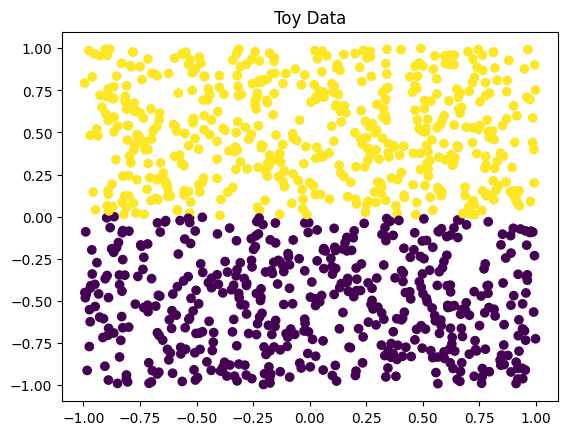

In [27]:
#plot data
fig, ax = plt.subplots()
ax.scatter(data.X[:,0], data.X[:,1], c=data.y)
ax.set_title("Toy Data")

In [24]:
model = ModMLP(2,2,1,50).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.BCEWithLogitsLoss()

In [25]:
for _ in range(10):
    _,_,_ = train(model, train_loader, optimizer, criterion, epochs=100, val_loader=val_loader, device=device, verbose=False, val_verbose=False, val_acts=True)
    test(model, val_loader, criterion, device=device, verbose=True)

Average loss: 0.0173, Accuracy: 97/100 (97.00%)
Average loss: 0.0104, Accuracy: 99/100 (99.00%)
Average loss: 0.0066, Accuracy: 99/100 (99.00%)
Average loss: 0.0042, Accuracy: 99/100 (99.00%)
Average loss: 0.0027, Accuracy: 100/100 (100.00%)
Average loss: 0.0018, Accuracy: 100/100 (100.00%)
Average loss: 0.0013, Accuracy: 100/100 (100.00%)
Average loss: 0.0009, Accuracy: 100/100 (100.00%)
Average loss: 0.0007, Accuracy: 100/100 (100.00%)
Average loss: 0.0006, Accuracy: 100/100 (100.00%)


Average loss: 0.4443, Accuracy: 1/100 (1.00%)
Angle: 0	0.995	0.995	0.99	Average loss: 0.0007, Accuracy: 100/100 (100.00%)
Angle: 10	0.995	0.995	0.99	Average loss: 0.0007, Accuracy: 100/100 (100.00%)
Angle: 20	0.995	0.995	0.99	Average loss: 0.0016, Accuracy: 100/100 (100.00%)
Angle: 30	0.995	0.995	0.99	Average loss: 0.0009, Accuracy: 100/100 (100.00%)
Angle: 40	0.995	0.995	0.99	Average loss: 0.0008, Accuracy: 100/100 (100.00%)
Angle: 50	0.995	0.995	0.99	Average loss: 0.0015, Accuracy: 100/100 (100.00%)
Angle: 60	0.995	0.995	0.99	Average loss: 0.0018, Accuracy: 100/100 (100.00%)
Angle: 70	0.995	0.995	0.99	Average loss: 0.0036, Accuracy: 100/100 (100.00%)
Angle: 80	0.995	0.995	0.99	Average loss: 0.0055, Accuracy: 100/100 (100.00%)
Angle: 90	0.995	0.995	0.99	Average loss: 0.0272, Accuracy: 59/100 (59.00%)
Angle: 100	0.995	0.995	0.99	Average loss: 0.1274, Accuracy: 2/100 (2.00%)
Angle: 110	0.995	0.995	0.99	Average loss: 0.1839, Accuracy: 0/100 (0.00%)
Angle: 120	0.995	0.995	0.99	Average los

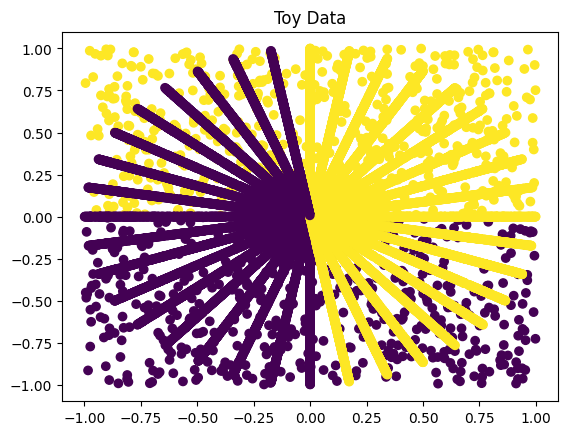

In [28]:
test(model, val_loader, criterion, device=device, verbose=True)
fig, ax = plt.subplots()
ax.scatter(data.X[:,0], data.X[:,1], c=data.y)
ax.set_title("Toy Data")
for angle in range(0, 180, 10):
    print("Angle:", angle, end="\t")
    newdata = TransferToyData(angle=math.radians(angle))
    ax.scatter(newdata.X[:,0], newdata.X[:,1], c=newdata.y)
    acts = defaultdict(list)
    train_loader, val_loader, test_loader = split_dataset(newdata, val_size=0.1, test_size=0.1, batch_size=32)
    test(model, val_loader, criterion, device=device, verbose=False)
    for key, value in model.activations.items():
        acts[key] = value.cpu()
        print("{:.3g}".format(orthogonality_gap(acts[key]).item()), end="\t")
    test(model, test_loader, criterion, device=device, verbose=True)